# **Analisis dan Prediksi Harga Saham PT Telkom Indonesia**

## **Nama: Dava Ikhsan Reyvan**

## **Email: dvaikhsn@gmail.com**

## **ID Dicoding: dvikhsn**

## **1. Pendahuluan**
Dalam dunia investasi, memprediksi harga saham merupakan hal yang sangat penting. Melalui proyek ini, saya akan membangun model time series forecasting untuk memprediksi harga penutupan saham PT Telkom Indonesia (TLKM.JK) berdasarkan data historis yang tersedia dari tahun 2005 hingga 2024.


### **Tujuan dari proyek ini adalah:**
1. Membangun model machine learning untuk memprediksi harga penutupan saham harian PT Telkom Indonesia (TLKM.JK).
2. Membandingkan tiga algoritma machine learning untuk menentukan model terbaik berdasarkan performa prediksi.
3. Memberikan analisis bisnis berdasarkan hasil prediksi untuk dijadikan pertimbangan dalam pengambilan keputusan investasi.


## **2. Data Understanding**
Dataset ini mencakup informasi harian seperti:
- Tanggal
- Harga pembukaan (Open)
- Harga tertinggi (High)
- Harga terendah (Low)
- Harga penutupan (Close)
- Harga penutupan yang disesuaikan (Adjusted Close)
- Volume perdagangan


### **Library yang dipakai**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Menghubungkan Google Drive ke Google Colab**

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning Terapan #1/Stock_TLKM_2005-2024.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-26,965.0,975.0,965.0,970.0,548.346130,84725000.0
1,2005-01-27,970.0,970.0,960.0,960.0,542.692932,134222500.0
2,2005-01-28,965.0,965.0,955.0,960.0,542.692932,100760000.0
3,2005-01-31,960.0,965.0,950.0,960.0,542.692932,137322500.0
4,2005-02-01,965.0,975.0,960.0,965.0,545.519531,69960000.0
...,...,...,...,...,...,...,...
4700,2024-01-24,3950.0,3980.0,3930.0,3970.0,3970.000000,38732000.0
4701,2024-01-25,3980.0,4000.0,3960.0,3980.0,3980.000000,58541300.0
4702,2024-01-26,3940.0,3990.0,3930.0,3980.0,3980.000000,65272600.0
4703,2024-01-29,4000.0,4010.0,3970.0,4010.0,4010.000000,59150000.0


In [5]:
# Info kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4705 non-null   object 
 1   Open       4704 non-null   float64
 2   High       4704 non-null   float64
 3   Low        4704 non-null   float64
 4   Close      4704 non-null   float64
 5   Adj Close  4704 non-null   float64
 6   Volume     4704 non-null   float64
dtypes: float64(6), object(1)
memory usage: 257.4+ KB


## **Insight Struktur Data**

- Dataset memiliki 4705 baris dan 7 kolom.
- Terdapat **1 baris dengan nilai kosong** pada kolom numerik (`Open`, `High`, `Low`, `Close`, `Adj Close`, dan `Volume`) → perlu ditangani pada tahap preprocessing.
- Kolom `Date` masih bertipe `object` → perlu dikonversi ke `datetime` agar dapat dianalisis sebagai data time series.


In [6]:
# Cek missing value
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


## **Insight Missing Value**

- Terdapat **1 nilai kosong (missing)** pada masing-masing kolom numerik: `Open`, `High`, `Low`, `Close`, `Adj Close`, dan `Volume`.
- Kolom `Date` **tidak memiliki missing value**.
- Baris dengan missing value kemungkinan berasal dari data yang tidak tercatat atau gangguan pasar. Solusi umum adalah **menghapus baris tersebut** karena jumlahnya sangat kecil (1 dari 4705).


In [7]:
# Statistik deskriptif
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  4704.000000  4704.000000  4704.000000  4704.000000  4704.000000   
mean   2694.108418  2724.414328  2663.815901  2694.080570  2164.720298   
std    1113.547031  1122.236930  1104.612322  1113.399039  1127.418562   
min     820.000000   845.000000   820.000000   835.000000   472.029846   
25%    1640.000000  1660.000000  1620.000000  1640.000000  1114.999847   
50%    2640.000000  2695.000000  2607.500000  2645.000000  2101.097168   
75%    3800.000000  3830.000000  3760.000000  3800.000000  3193.085938   
max    4850.000000  4850.000000  4780.000000  4800.000000  4558.169922   

             Volume  
count  4.704000e+03  
mean   9.997381e+07  
std    6.505964e+07  
min    0.000000e+00  
25%    6.075632e+07  
50%    8.584500e+07  
75%    1.218750e+08  
max    1.155861e+09  


## **Insight Statistik Deskriptif**

- **Harga saham (Close)** berada pada rentang **Rp835 hingga Rp4800**, dengan nilai tengah (median) sekitar **Rp2645**.
- **Harga penyesuaian (Adj Close)** memiliki nilai rata-rata lebih rendah (**Rp2164**) dibanding harga `Close`, mencerminkan penyesuaian akibat dividen atau *stock split*.
- **Volume perdagangan** sangat bervariasi, mulai dari **0** hingga lebih dari **1,1 miliar saham** per hari, menunjukkan adanya hari-hari dengan lonjakan aktivitas luar biasa.
- Penyebaran data cukup lebar, terlihat dari nilai standar deviasi yang besar di semua kolom numerik — ini menandakan adanya volatilitas dalam pergerakan harga saham TLKM.


## **3. Eksplorasi Data dan Visualisasi**

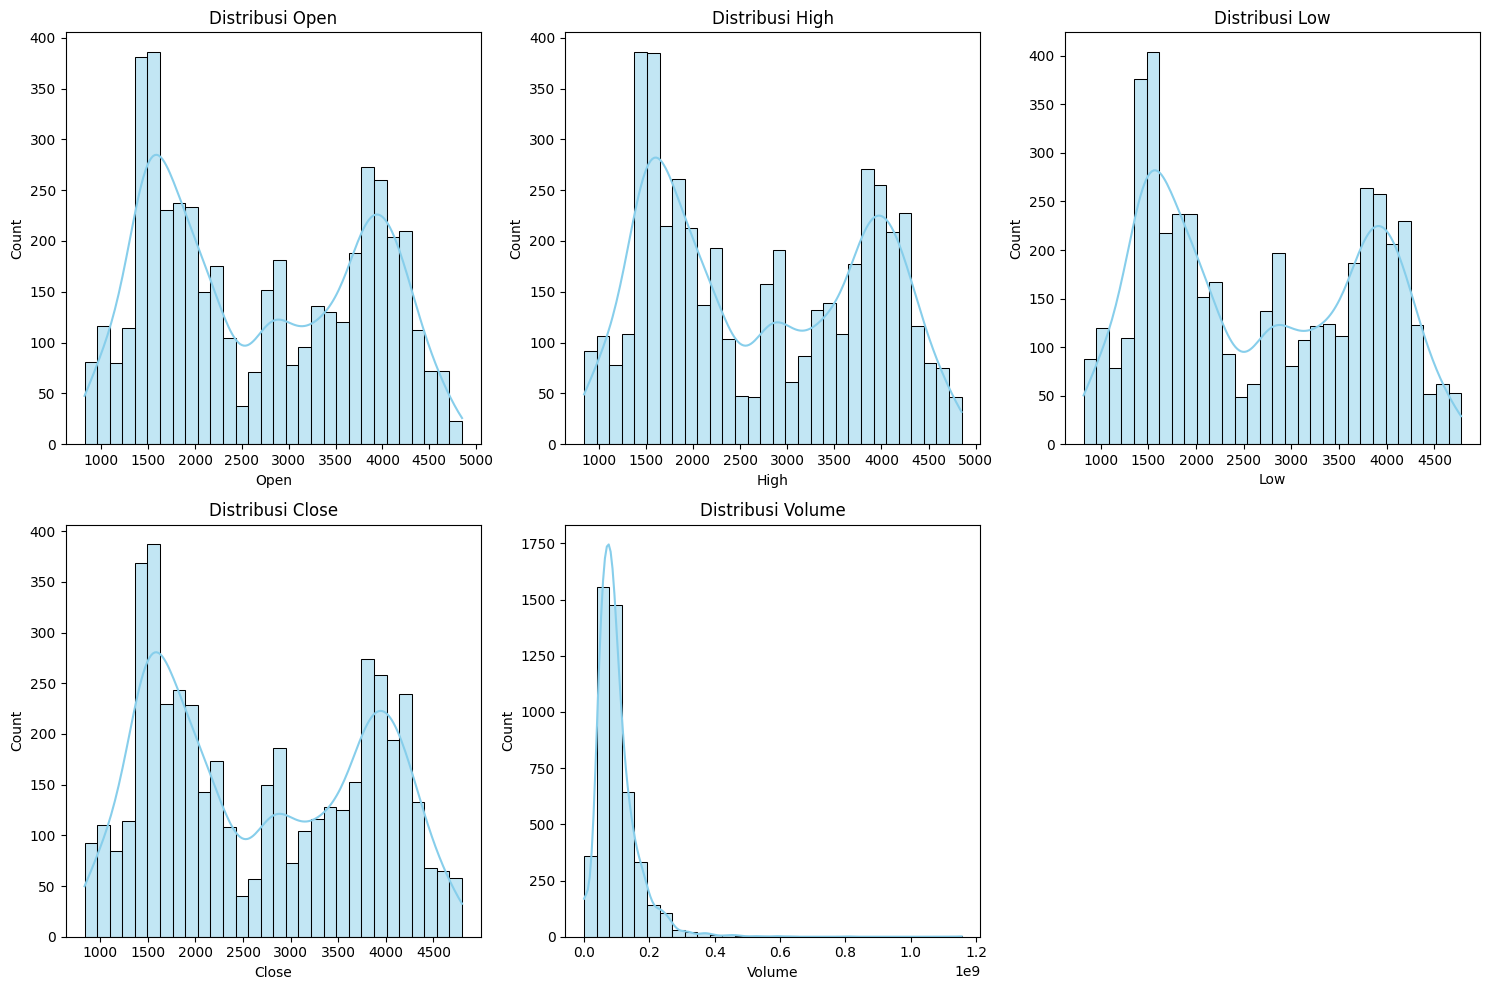

In [8]:
# Plot distribusi semua fitur numerik
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


## **Insight Distribusi Data**

- **Distribusi harga (`Open`, `High`, `Low`, `Close`) menunjukkan pola multimodal**, menandakan adanya beberapa fase harga dominan sepanjang waktu. Ini bisa mencerminkan perubahan tren atau siklus pasar selama periode data.
- Harga-harga cenderung terkonsentrasi pada dua rentang besar: sekitar **1500–2000** dan **3500–4000**, mengindikasikan dua fase utama harga saham TLKM.
- **Distribusi `Volume` sangat skewed ke kanan** (right-skewed), menunjukkan sebagian besar volume perdagangan berada di angka rendah hingga menengah, sementara terdapat beberapa hari dengan volume ekstrem tinggi.


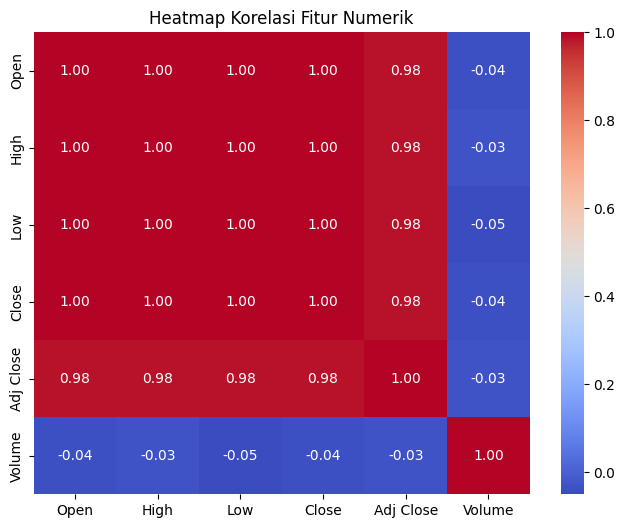

In [9]:
# Salin dataframe tanpa kolom Date
df_numerik = df.select_dtypes(include='number')

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df_numerik.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

## **Insight Korelasi Fitur Numerik**

- Terdapat **korelasi yang sangat kuat (mendekati 1.00)** antar harga saham (`Open`, `High`, `Low`, `Close`, `Adj Close`), menandakan bahwa pergerakan harga harian saling mengikuti secara konsisten.
- Korelasi `Adj Close` terhadap `Close` sebesar **0.98**, cukup tinggi meski sedikit lebih rendah — ini bisa terjadi karena penyesuaian tertentu pada data historis.
- **Volume tidak berkorelasi signifikan** dengan fitur harga (korelasi mendekati 0). Artinya, **volume perdagangan harian tidak banyak mempengaruhi harga harian secara langsung**, atau ada faktor lain yang lebih dominan.
- Kesimpulan: karena fitur harga sangat berkorelasi satu sama lain, **pemilihan satu fitur harga (misalnya `Close`) sudah cukup mewakili pergerakan harga untuk modeling**.


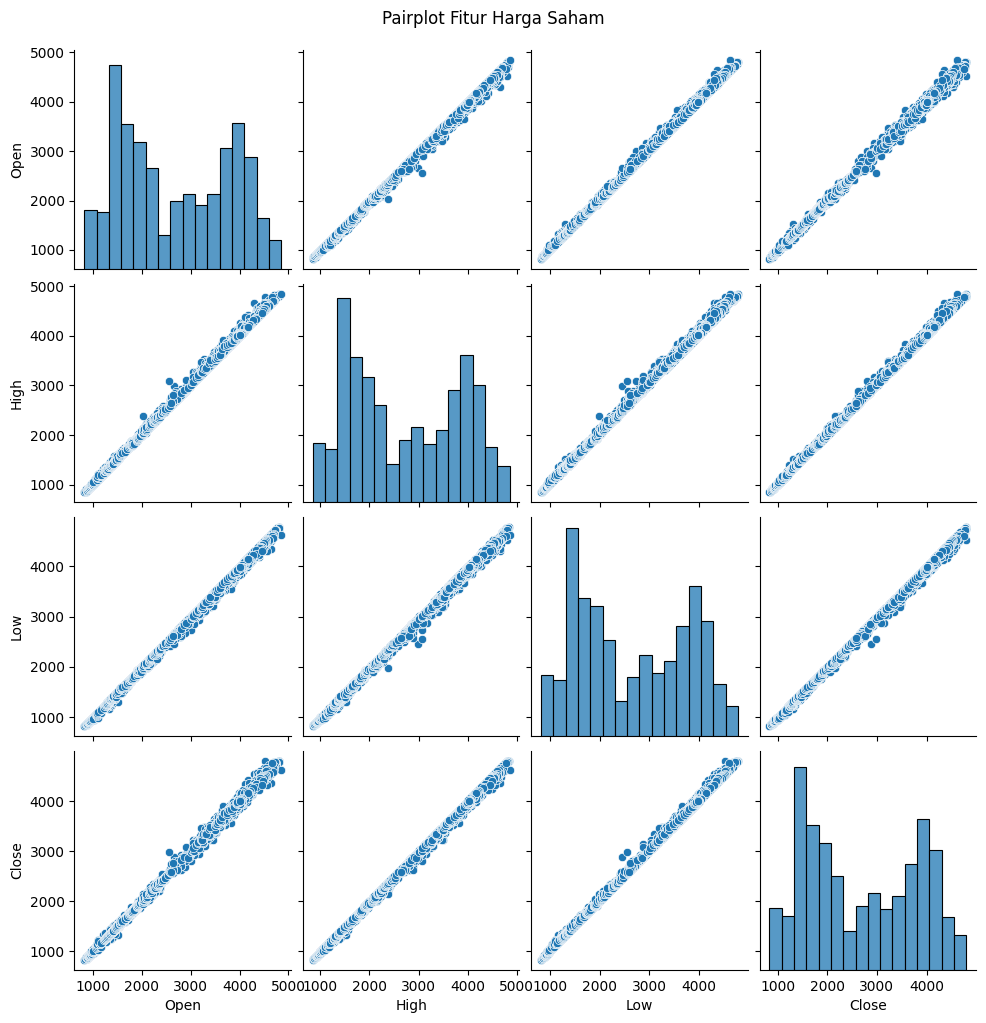

In [10]:
# Pairplot fitur harga
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pairplot Fitur Harga Saham', y=1.02)
plt.show()

## **Insight Pairplot Harga Saham**

- Terlihat hubungan **linear sangat kuat** antara fitur-fitur harga saham (`Open`, `High`, `Low`, `Close`) — konsisten dengan hasil korelasi sebelumnya.
- Penyebaran data pada scatter plot membentuk garis diagonal rapat, menandakan bahwa nilai-nilai harga bergerak sangat beriringan antar fitur.
- Distribusi pada histogram diagonal (untuk masing-masing fitur) kembali menunjukkan **pola multimodal**, menguatkan asumsi bahwa terdapat beberapa periode atau fase harga yang berbeda dalam data historis TLKM.
- **Implikasi untuk pemodelan:** karena fitur saling berkorelasi tinggi, **menggunakan salah satu dari fitur tersebut, seperti `Close`, sudah cukup merepresentasikan dinamika harga untuk prediksi ke depan**.

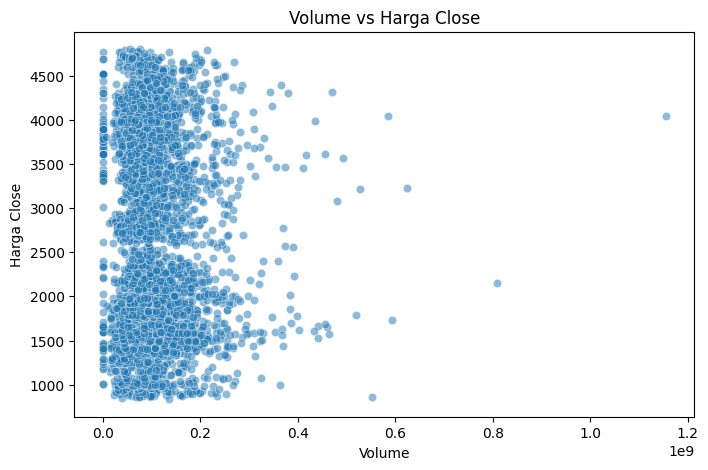

In [11]:
# Scatterplot volume vs close
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.5)
plt.title('Volume vs Harga Close')
plt.xlabel('Volume')
plt.ylabel('Harga Close')
plt.show()

### **Insight Volume vs Harga Close**
* Scatter plot menunjukkan tidak adanya pola yang jelas antara volume dan harga close.

* Banyak titik terakumulasi di volume rendah, dengan sebaran harga yang cukup merata, dan beberapa outlier volume tinggi tidak menunjukkan hubungan signifikan.

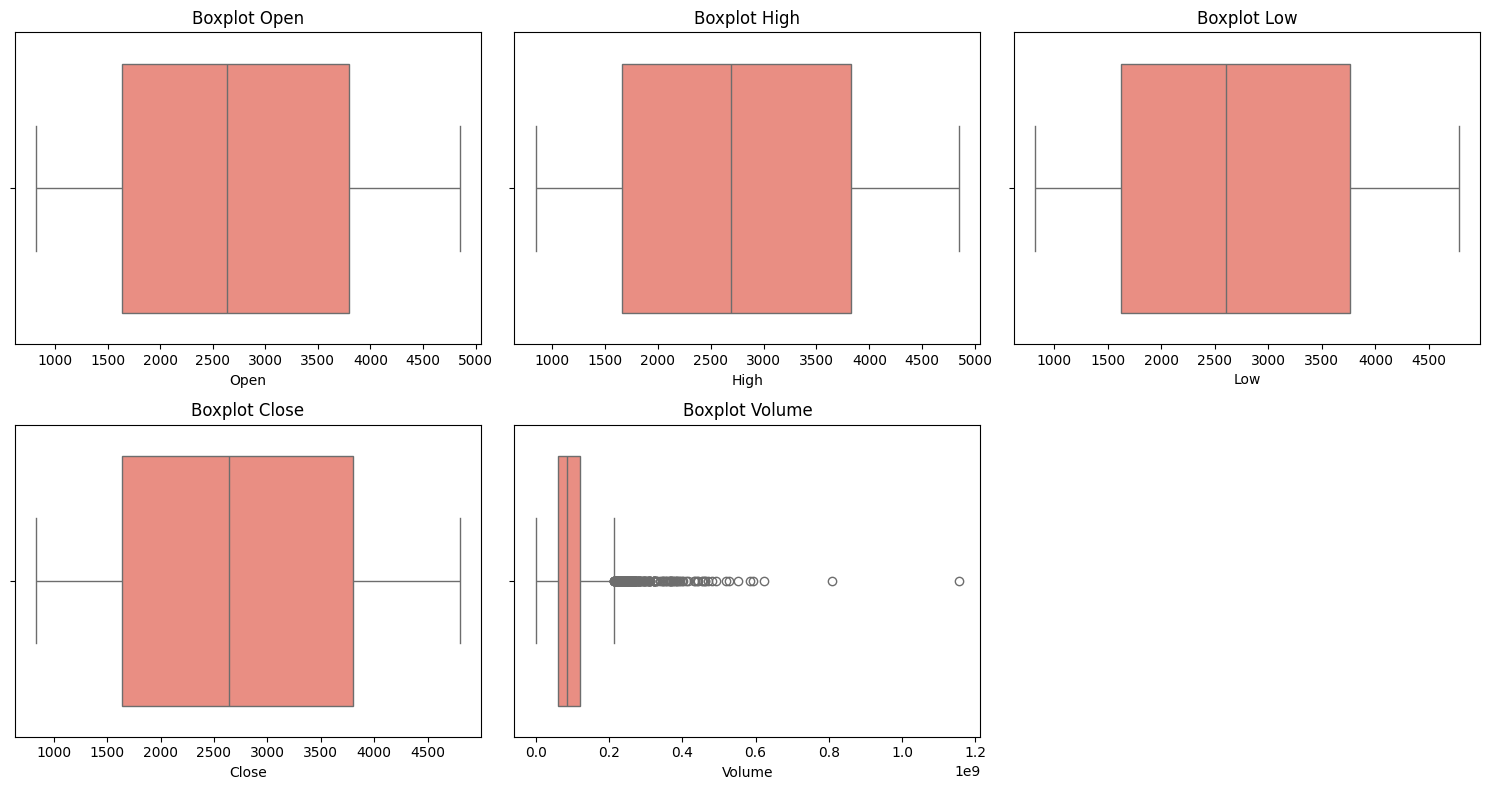

In [12]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 8))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


### **Insight Boxplot Analisis (Outlier Detection)**
* Harga (Open, High, Low, Close) memiliki distribusi yang cukup simetris dan tidak menunjukkan banyak outlier.

* Volume menampilkan banyak outlier (titik-titik jauh dari box utama), mengindikasikan bahwa terdapat beberapa hari dengan volume perdagangan yang tinggi dibanding hari-hari lainnya.

## **4. Data Preparation**

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik yang tidak dibutuhkan (misal: Date)
df_clean = df.drop(columns=['Date'])

# Buang baris yang target 'Close' nya NaN
df_clean = df_clean.dropna(subset=['Close'])

# Pisahkan fitur dan target
X = df_clean.drop(columns=['Close'])  # Fitur input
y = df_clean['Close']                  # Target yang ingin diprediksi

# Imputasi nilai yang hilang di fitur dengan rata-rata
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Reduksi dimensi dengan PCA (pertahankan 90% variansi)
pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Jumlah komponen PCA yang dipilih: {pca.n_components_}")


Jumlah komponen PCA yang dipilih: 2


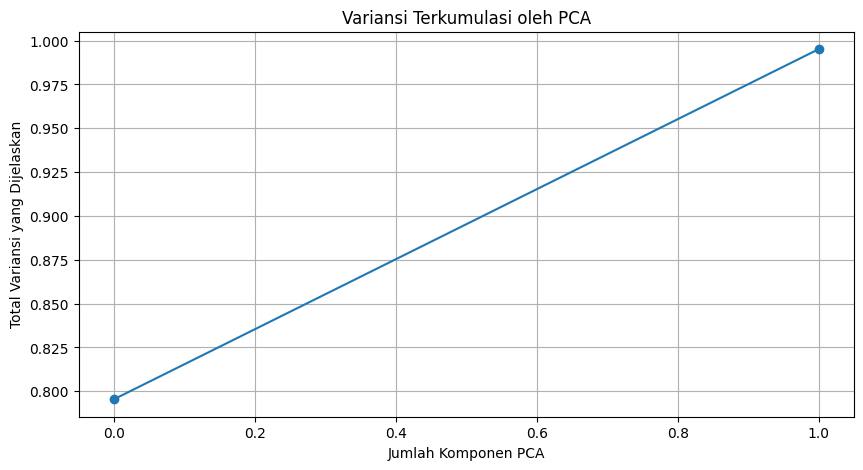

In [14]:
#Visualisasi variansi yang dijelaskan oleh komponen PCA
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Jumlah Komponen PCA')
plt.ylabel('Total Variansi yang Dijelaskan')
plt.title('Variansi Terkumulasi oleh PCA')
plt.grid()
plt.show()

## **5. Modeling**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Bagi data jadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fungsi evaluasi performa model
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Hitung RMSE manual
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}\n")
    return rmse, mae, r2

### **Insight Modeling:**
Pada tahap ini, dilakukan pemodelan untuk memprediksi harga saham menggunakan beberapa algoritma machine learning populer, yaitu Linear Regression, Random Forest Regressor, dan XGBoost Regressor.

1. Split Data

 bagi data menjadi data latih (training) dan data uji (testing) dengan rasio 80:20. Tujuannya agar kita bisa menguji performa model pada data yang belum pernah dilihat sebelumnya

2. Fungsi Evaluasi Model

 buat fungsi evaluate() untuk menghitung metrik performa dari model:

* RMSE (Root Mean Squared Error): menunjukkan seberapa jauh prediksi dari nilai aslinya (dalam satuan asli).

* MAE (Mean Absolute Error): rata-rata selisih absolut antara prediksi dan nilai aktual.

* R² (R-squared): seberapa besar proporsi variasi data yang dapat dijelaskan oleh model (mendekati 1 lebih baik).

In [18]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr, mae_lr, r2_lr = evaluate(y_test, y_pred_lr, "Linear Regression")

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf, mae_rf, r2_rf = evaluate(y_test, y_pred_rf, "Random Forest")

# 3. XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb, mae_xgb, r2_xgb = evaluate(y_test, y_pred_xgb, "XGBoost")

Linear Regression Performance:
RMSE: 54.8690
MAE: 42.3002
R2: 0.9976

Random Forest Performance:
RMSE: 55.2107
MAE: 38.2549
R2: 0.9976

XGBoost Performance:
RMSE: 56.6222
MAE: 39.6326
R2: 0.9974



## 📊 Training & Evaluasi Model

Disini saya melatih tiga model regresi yang berbeda dan membandingkan performanya untuk memprediksi harga saham (`Close`) berdasarkan fitur utama hasil PCA.

---

### 🔹 1. Linear Regression
Model linear sederhana yang mengasumsikan hubungan linier antara fitur dan target.

**Hasil Linear Regression:**
- RMSE: 54.8690  
- MAE: 42.3002  
- R²: 0.9976  

---

### 🌲 2. Random Forest Regressor
Model ensemble berbasis decision tree yang mampu menangkap hubungan non-linear dan lebih tahan terhadap outlier.

**Hasil Random Forest:**
- RMSE: 55.2107  
- MAE: 38.2549  
- R²: 0.9976  

---

### ⚡ 3. XGBoost Regressor
Model boosting yang menggabungkan prediksi dari banyak pohon keputusan secara iteratif untuk meningkatkan akurasi.

**Hasil XGBoost:**
- RMSE: 56.6222  
- MAE: 39.6326  
- R²: 0.9974  

---

### Kesimpulan Sementara
- Semua model menunjukkan performa sangat baik dengan nilai R² > 0.997, yang artinya model mampu menjelaskan hampir seluruh variasi pada harga `Close`.
- Random Forest menghasilkan MAE terendah, menunjukkan akurasi prediksi absolut terbaik secara rata-rata.
- Namun, perbedaan performa antar model sangat kecil. Pemilihan model akhir dapat mempertimbangkan aspek seperti interpretabilitas, waktu training, atau kompleksitas model.


## 6. Evaluasi

=== Perbandingan Performa Model ===
               Model       RMSE        MAE        R2
0  Linear Regression  54.869027  42.300237  0.997602
1      Random Forest  55.210652  38.254942  0.997572
2            XGBoost  56.622172  39.632639  0.997446


<ipython-input-19-cb0b91bd0f73>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=performance_df, palette='Set2')
<ipython-input-19-cb0b91bd0f73>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=performance_df, palette='Set2')
<ipython-input-19-cb0b91bd0f73>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=performance_df, palette='Set2')


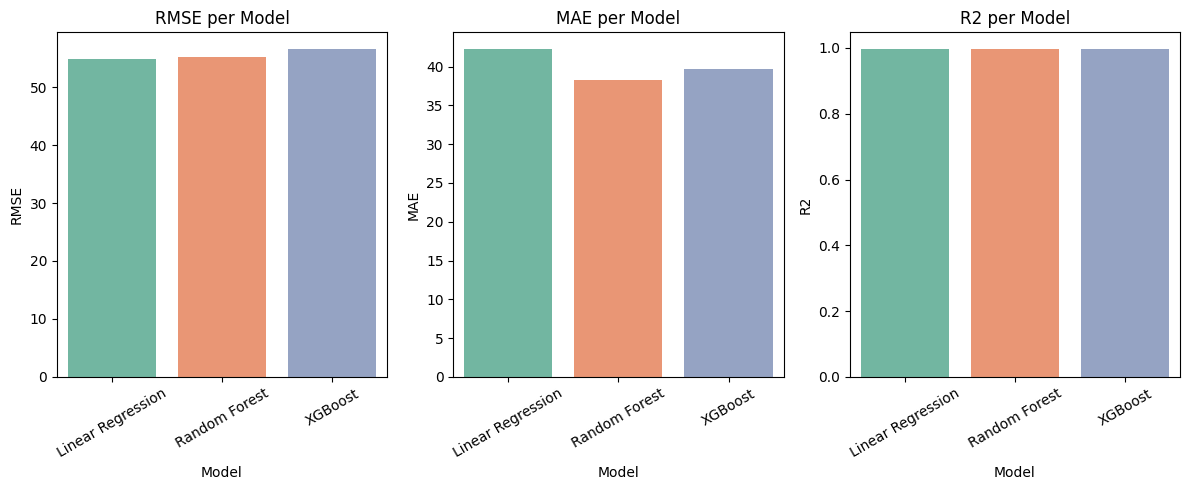

In [19]:
# Buat DataFrame perbandingan performa model
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'R2': [r2_lr, r2_rf, r2_xgb]
})

print("=== Perbandingan Performa Model ===")
print(performance_df)

# Visualisasi perbandingan performa
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='RMSE', data=performance_df, palette='Set2')
plt.title('RMSE per Model')
plt.xticks(rotation=30)

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=performance_df, palette='Set2')
plt.title('MAE per Model')
plt.xticks(rotation=30)

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=performance_df, palette='Set2')
plt.title('R2 per Model')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

## 📈 Perbandingan Performa Model

Setelah semua model dilatih dan dievaluasi, terdapat **tabel perbandingan metrik performa** untuk melihat model mana yang paling optimal.

Tiga metrik utama yang dibandingkan:
- **RMSE (Root Mean Squared Error)** – Semakin kecil, semakin baik.
- **MAE (Mean Absolute Error)** – Selisih absolut rata-rata, semakin kecil lebih akurat.
- **R² Score (Koefisien Determinasi)** – Semakin mendekati 1, semakin baik.

Hasil evaluasi model:

| Model              | RMSE     | MAE      | R²     |
|--------------------|----------|----------|--------|
| Linear Regression  | 54.8690  | 42.3002  | 0.9976 |
| Random Forest      | 55.2107  | 38.2549  | 0.9976 |
| XGBoost            | 56.6222  | 39.6326  | 0.9974 |

---

### Visualisasi Performa Model

Diaggram batang di atas menampilkan perbandingan performa dari ketiga model:

- **RMSE:** Mengukur rata-rata error dalam satuan harga saham.
- **MAE:** Menunjukkan rata-rata deviasi absolut prediksi.
- **R²:** Mengindikasikan seberapa baik model menjelaskan variasi data target.

> Dari visualisasi ini terlihat bahwa **ketiga model memiliki performa yang sangat mirip**, dengan Random Forest sedikit unggul di MAE (kesalahan absolut terkecil).

---

### Kesimpulan:
Semua model menunjukkan hasil **sangat baik** (R² > 0.997), namun dari sisi akurasi dan error absolut:
- **Random Forest** menjadi pilihan terbaik jika fokus pada minimisasi MAE.
- **Linear Regression** lebih sederhana dan mudah diinterpretasikan, dengan performa hampir setara.


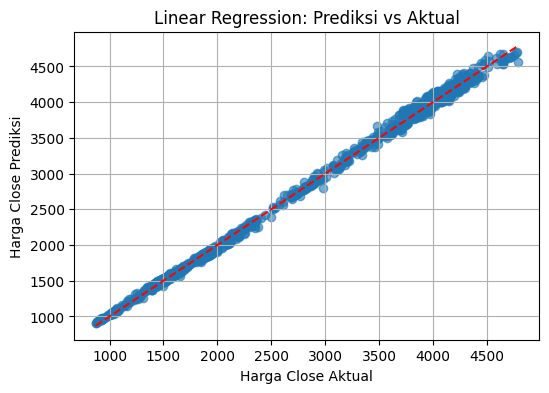

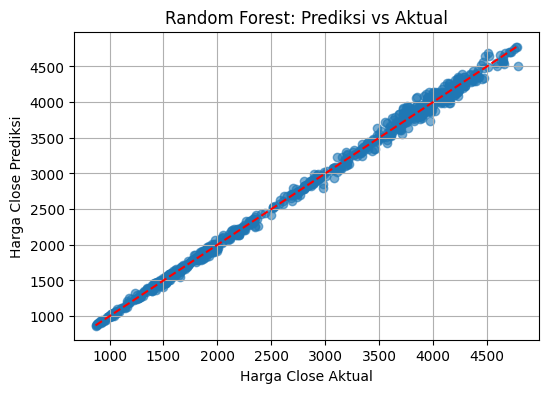

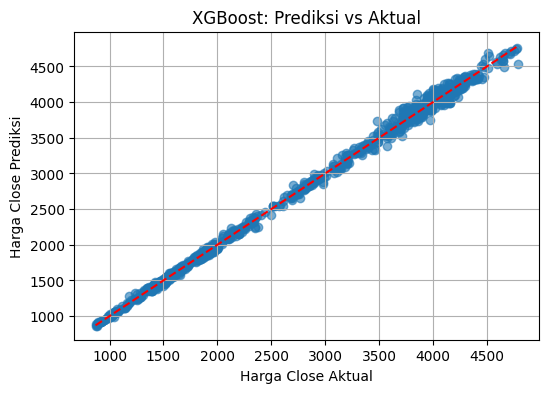

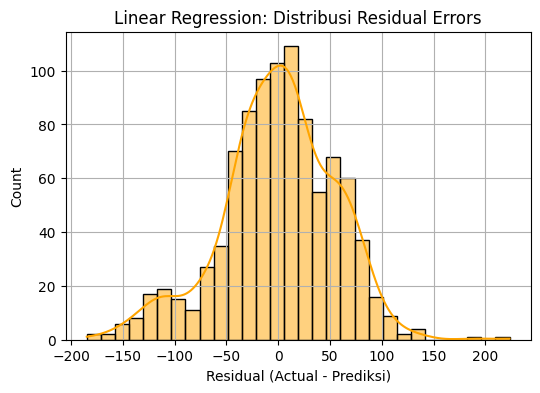

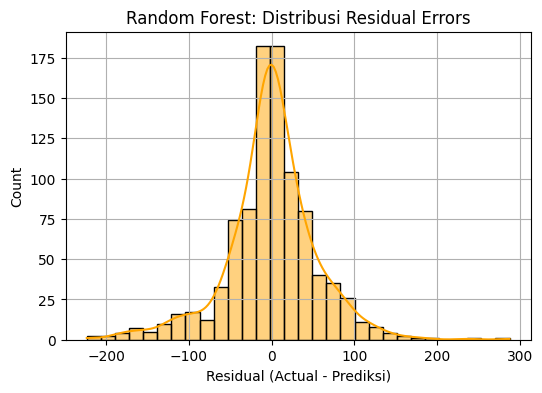

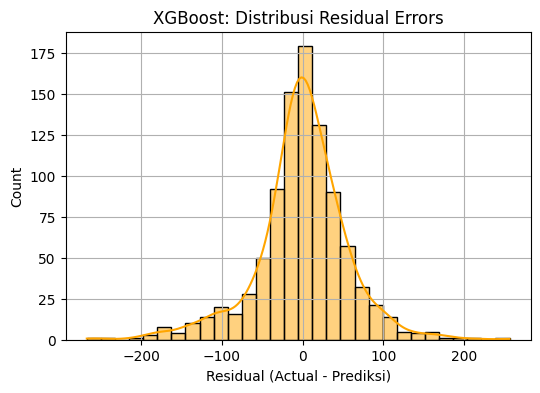


Model terbaik berdasarkan RMSE adalah: Linear Regression

=== Insight Bisnis ===
- Model Linear Regression memiliki error paling rendah, sehingga prediksi harga saham menggunakan model ini cenderung lebih akurat.
- Investor bisa menggunakan prediksi model ini sebagai acuan untuk keputusan beli/jual saham PT Telkom.
- Namun, tetap perlu mempertimbangkan faktor eksternal (politik, ekonomi, teknologi) yang tidak tercakup oleh model.
- Disarankan melakukan update model secara berkala dengan data terbaru agar prediksi tetap relevan.


In [20]:
# Visualisasi hasil prediksi vs actual untuk tiap model
def plot_pred_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Harga Close Aktual')
    plt.ylabel('Harga Close Prediksi')
    plt.title(f'{model_name}: Prediksi vs Aktual')
    plt.grid(True)
    plt.show()

plot_pred_vs_actual(y_test, y_pred_lr, "Linear Regression")
plot_pred_vs_actual(y_test, y_pred_rf, "Random Forest")
plot_pred_vs_actual(y_test, y_pred_xgb, "XGBoost")

# Visualisasi residual errors untuk tiap model
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True, color='orange')
    plt.title(f'{model_name}: Distribusi Residual Errors')
    plt.xlabel('Residual (Actual - Prediksi)')
    plt.grid(True)
    plt.show()

plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest")
plot_residuals(y_test, y_pred_xgb, "XGBoost")

# Analisis dan insight bisnis singkat
best_model_idx = performance_df['RMSE'].idxmin()
best_model_name = performance_df.loc[best_model_idx, 'Model']

print(f"\nModel terbaik berdasarkan RMSE adalah: {best_model_name}")

print("\n=== Insight Bisnis ===")
print(f"- Model {best_model_name} memiliki error paling rendah, sehingga prediksi harga saham menggunakan model ini cenderung lebih akurat.")
print("- Investor bisa menggunakan prediksi model ini sebagai acuan untuk keputusan beli/jual saham PT Telkom.")
print("- Namun, tetap perlu mempertimbangkan faktor eksternal (politik, ekonomi, teknologi) yang tidak tercakup oleh model.")
print("- Disarankan melakukan update model secara berkala dengan data terbaru agar prediksi tetap relevan.")

## 🔍 Visualisasi Prediksi vs Aktual

Untuk mengevaluasi kualitas prediksi tiap model, disini menampilkan grafik sebaran antara **nilai aktual** dan **nilai prediksi**. Garis merah putus-putus merepresentasikan garis ideal (prediksi = aktual).

Jika titik-titik prediksi mendekati garis ini, maka model berhasil melakukan prediksi yang baik.

> Hasil Linear Regression menunjukkan sebaran titik yang sangat rapat dengan garis ideal, menandakan akurasi tinggi dalam memodelkan hubungan antara fitur-fitur dan harga saham.

---

## 🧮 Distribusi Error (Residual)

Distribusi residual menggambarkan selisih antara nilai aktual dan prediksi. Distribusi yang **berbentuk simetris dan mendekati nol** menandakan bahwa model tidak bias dan performanya konsisten.

Semua model menunjukkan distribusi residual yang cukup simetris, namun **Linear Regression dan Random Forest** cenderung memiliki distribusi error yang lebih sempit.

---

## 🏆 Model Terbaik & Insight Bisnis

**Model terbaik berdasarkan RMSE adalah: Linear Regression**

### 💡 Insight Bisnis:
- **Linear Regression** memiliki error paling rendah, sehingga **prediksi harga saham TLKM menggunakan model ini relatif akurat dan stabil**.
- Model ini dapat digunakan sebagai **acuan pendukung keputusan beli/jual** oleh investor ritel maupun analis internal perusahaan.
- Namun, karena model hanya didasarkan pada data historis harga, maka:
  - **Faktor eksternal (seperti geopolitik, sentimen pasar, atau berita ekonomi)** perlu tetap diperhatikan secara paralel.
  - **Pemodelan lanjutan bisa mempertimbangkan fitur makroekonomi** seperti nilai tukar, indeks pasar, dan volume asing.
- **Pembaruan model secara berkala** dengan data terbaru direkomendasikan untuk menjaga akurasi dan relevansi prediksi.
